# Midterm Review

The goals of this notebook are to review a few basic commands we should know how to use, and problems we might encounter.

## 1. Precision

In [210]:
# The 'round' function lets me round to a fixed number of decimals,
x = 0.12345
print(x, "rounded to 3 decimals is", round(x, 3))

# So why doesn't this work? How might I fix it so the comparison works like "expected"?
round(.1, 1) + round(.1, 1) + round(.1, 1) == round(.3, 1)

0.12345 rounded to 3 decimals is 0.123


False

## 2. Array slicing

In [209]:
import numpy as np
# Below I have a 3x3 array. I'd like to extract some information from it.
numbers = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])
# I can access the element in the second row and column, 9.
print(numbers[2][2])
# Now I would like the entire first column. This should give me an array [1, 4, 7],
# but it is giving me the first row instead. How do I fix this?
print(numbers[:][0])

9
[1 2 3]


## 3. Root finding, optimization

In [208]:
import scipy.optimize as opt
import scipy.special as sf

# I'd like to find a minimum.
root = opt.brentq(sf.cotdg, 150, 210)
print("Root found at:", root)

# It found one! So why doesn't it seem to be a root?
print("Function value at root is:", sf.cotdg(root))

Root found at: 179.9999999999983
Function value at root is: -33539928785573.652


## 4. Interpolation

In [207]:
import numpy as np
import scipy.interpolate as interp

# Let's generate some random data
x = np.arange(10)
y = np.random.rand(10)

# Construct a spline, and its derivative.
ifn = interp.InterpolatedUnivariateSpline(x, y)

# Compute the 4th derivative of the spline.
dfn = ifn.derivative(4)
# Hm, What is going on? What things could I try to work around this? (Don't worry about actually doing so.)

ValueError: Order of derivative (n = 4) must be <= order of spline (k = 3)

## 5. Linear Systems

In [206]:
import numpy as np
import scipy.linalg as la

# Suppose I am trying to solve Ax = b for x, given:
A = np.array([
    [1,4,2],
    [2,1,4],
    [3,5,6]
])
b = np.array([1, 2, 3])

# I know a solution for b exists,
x = np.array([0.2, 0, 0.4])
print("The product A@x-b for x =", sol, "is", A@x-b)
# This seems to be a valid solution.

# But, I get an error when I try to ask Python to solve this system of equations.
# What is going on? How can I "work around" this problem?
la.solve(A, b)

The product A@x-b for x = [0.2 0.  0.4] is [0.0000000e+00 0.0000000e+00 4.4408921e-16]


C:\Users\James\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number9.251859e-18


array([0. , 0. , 0.5])

## 6. Eigenvalue problems

In [205]:
import numpy as np
import scipy.linalg as la

# Consider the matrix A,
A = np.array([
    [1,2,0],
    [2,1,3],
    [0,4,2]
])

# These commands return different eigenvalues. What is going on?
print("la.eigvals gives:", la.eigvals(A))
print("la.eigvalsh gives:", la.eigvalsh(A))

# What form might you expect the below functions to accept?
# la.eig_banded
# la.eigh_tridiagonal

la.eigvals gives: [-2.66432541+0.j  1.24712631+0.j  5.4171991 +0.j]
la.eigvalsh gives: [-3.10694688  1.19842204  5.90852483]


## 7. Least-squares fitting

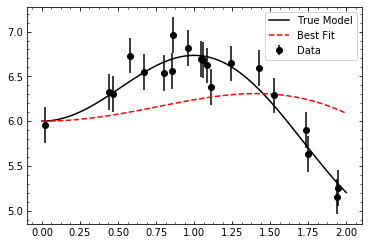

In [201]:
import numpy as np
import scipy.optimize as opt

# Here is some random data
np.random.seed(8)
x = np.random.rand(20) * 2
a1 = 1.4
def ymodel(x, a1) :
    return np.sin(a1*x)**2 + a2*np.cos(a3*x)**2

ytrue = ymodel(x, a1)
sigma_y = 0.2
y = ytrue + sigma_y*np.random.randn(len(ytrue))

# Let's try to fit with a model.
(p, C) = opt.curve_fit(ymodel, x, y, p0=(0), absolute_sigma=True)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.errorbar(x, y, yerr=sigma_y, fmt='ko', label='Data')
ax.plot(xfine, ymodel(xfine, a1), 'k-', label='True Model')
ax.plot(xfine, ymodel(xfine, *p), 'r--', label='Best Fit')
ax.legend(numpoints=1, loc='best')

# Hm, what went wrong? How can we fix this?